# Taiwanese Stock Price Prediction System: Project Overview
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade


## Project Objective
The goal of this project is to develop a robust, explainable, and industry-compliant predictive system for Taiwanese listed and OTC stocks. Using historical price data (Date, Open, High, Low, Close, Volume) from over 1000 CSV files, the system will forecast future stock price movements, returns, or trends, providing actionable insights for investors and decision-makers.

---

## Project Workflow

### 1. Data Acquisition & Preprocessing
- Consolidate all CSV files into a unified dataset.
- Clean the data by handling missing values, correcting outliers, and ensuring consistency.
- Engineer features including technical indicators (SMA, EMA, RSI, MACD), returns, volatility measures, and time-based features.

### 2. Exploratory Data Analysis (EDA)
- Visualize price and volume distributions.
- Detect trends, seasonality, and correlations between stocks.
- Identify anomalies or irregular patterns for further investigation.

### 3. Model Design
- Define the problem as regression (predict price/returns) or classification (predict direction/up-down movement).
- Select candidate models:
  - Traditional models: Linear Regression, Random Forest, XGBoost.
  - Deep learning models: LSTM, GRU, Temporal Convolutional Networks.
- Ensure explainability using SHAP values, attention mechanisms, and feature importance analysis.

### 4. Model Training & Validation
- Split data using time-series aware train/validation/test sets.
- Apply scaling and normalization where appropriate.
- Optimize hyperparameters using Grid Search, Random Search, or Bayesian Optimization.
- Evaluate models using metrics like MAE, RMSE, accuracy, directional accuracy, and financial risk metrics (Sharpe Ratio, Max Drawdown).

### 5. Deployment & Real-time Integration
- Deploy models as REST APIs or microservices.
- Automate daily data ingestion and prediction pipelines.
- Monitor model performance and adapt to market changes.

### 6. Risk Management & Compliance
- Implement ensemble approaches to reduce reliance on a single model.
- Maintain full traceability and audit logs for regulatory compliance.
- Generate explainable reports for each prediction.

### 7. Innovative Enhancements
- Adaptive model ensembles based on market regimes.
- Benchmarking system comparing predictions against historical and sector trends.
- Optional integration of macroeconomic indicators for improved predictive power.

---

## Expected Outcome
A fully functional predictive system capable of generating reliable, explainable forecasts for Taiwanese stock prices. This system provides actionable insights, adheres to industry standards, and serves as a decision-support tool for investors and regulatory audits.


In [1]:
# Import Libraries

# Data manipulation
import pandas as pd
import numpy as np
import glob
import os
from datetime import datetime

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Feature engineering and scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Model building
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import xgboost as xgb
import lightgbm as lgb

# Deep learning models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, f1_score, precision_score, recall_score

# Explainability
import shap

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)

print("All libraries imported successfully.")


C:\Users\AKINMADE FARUQ\anaconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\AKINMADE FARUQ\anaconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\AKINMADE FARUQ\anaconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid co

All libraries imported successfully.


In [2]:
# Data Ingestion and Consolidation

# Define the folder path containing all CSV files
folder_path = r"C:\Users\AKINMADE FARUQ\Downloads\PROJECT MATERIALS\My Projects\New upload\Taiwan Stocks\Historical Price for Taiwan Listed and OTC Stocks"

# Use glob to get all CSV file paths
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Initialize an empty list to store individual DataFrames
dataframes = []

# Loop through each CSV file and read it into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    
    # Ensure the 'Date' column is in datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    
    # Optional: add a column for the stock symbol (assuming file name is the stock symbol)
    stock_symbol = os.path.basename(file).replace(".csv", "")
    df['Stock'] = stock_symbol
    
    # Append to the list
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
all_stocks_df = pd.concat(dataframes, ignore_index=True)

# Sort by Stock and Date
all_stocks_df.sort_values(by=['Stock', 'Date'], inplace=True)
all_stocks_df.reset_index(drop=True, inplace=True)

# Display basic information
print(f"Total number of records: {all_stocks_df.shape[0]}")
print(f"Total number of stocks: {all_stocks_df['Stock'].nunique()}")
all_stocks_df.head()


Total number of records: 7824589
Total number of stocks: 1880


,Date,Open,High,Low,Close,Volume,Stock
0,2000-01-04,5.524504570893489,5.6552629470825195,5.524504570893489,5.6552629470825195,112224035437,1101
1,2000-01-05,5.5408501152370455,5.949467192866055,5.5408501152370455,5.802364826202393,173155306,1101
2,2000-01-06,5.753329387156409,5.818708728246989,5.508157712430608,5.557193756103516,86020939,1101
3,2000-01-07,5.32836808237991,5.573537379213446,5.23030009025004,5.540848731994629,101172336,1101
4,2000-01-10,5.557195065585302,5.753330742855053,5.4754703573463726,5.72064208984375,90915655,1101


In [3]:
# Data Cleaning and Preprocessing

# 1. Remove rows with missing Date or Close values (critical for modeling)
all_stocks_df.dropna(subset=['Date', 'Close'], inplace=True)

# 2. Convert numeric columns to float (handle any non-numeric strings)
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_cols:
    all_stocks_df[col] = pd.to_numeric(all_stocks_df[col], errors='coerce')

# 3. Forward-fill missing values within each stock
all_stocks_df[numeric_cols] = all_stocks_df.groupby('Stock')[numeric_cols].ffill()

# 4. Remove negative or zero prices and volumes (invalid data)
all_stocks_df = all_stocks_df[(all_stocks_df[numeric_cols] > 0).all(axis=1)]

# 5. Reset index
all_stocks_df.reset_index(drop=True, inplace=True)

# 6. Feature: Daily return
all_stocks_df['Return'] = all_stocks_df.groupby('Stock')['Close'].pct_change()

# 7. Feature: Daily price change (High-Low)
all_stocks_df['Price_Change'] = all_stocks_df['High'] - all_stocks_df['Low']

# 8. Feature: 5-day rolling volatility of returns
all_stocks_df['Volatility_5'] = all_stocks_df.groupby('Stock')['Return'].rolling(window=5).std().reset_index(0, drop=True)

# 9. Fill remaining NaNs from pct_change and rolling calculations with 0
all_stocks_df.fillna(0, inplace=True)

# 10. Display cleaned data overview
print("Data cleaning completed successfully.")
print(f"Total records after cleaning: {all_stocks_df.shape[0]}")
all_stocks_df.head()


Data cleaning completed successfully.
Total records after cleaning: 7489511


,Date,Open,High,Low,Close,Volume,Stock,Return,Price_Change,Volatility_5
0,2000-01-04,5.5245,5.6553,5.5245,5.6553,112224035437,1101,0.0000,0.1308,0.0000
1,2000-01-05,5.5409,5.9495,5.5409,5.8024,173155306,1101,0.0260,0.4086,0.0000
2,2000-01-06,5.7533,5.8187,5.5082,5.5572,86020939,1101,-0.0423,0.3106,0.0000
3,2000-01-07,5.3284,5.5735,5.2303,5.5408,101172336,1101,-0.0029,0.3432,0.0000
4,2000-01-10,5.5572,5.7533,5.4755,5.7206,90915655,1101,0.0324,0.2779,0.0000


In [4]:
# Advanced Feature Engineering: Technical Indicators


def add_technical_indicators(df):
    # Sort by Stock and Date
    df = df.sort_values(['Stock', 'Date']).copy()
    
    # Group by Stock for rolling calculations
    grouped = df.groupby('Stock')

    # Simple Moving Averages (SMA)
    df['SMA_5'] = grouped['Close'].transform(lambda x: x.rolling(window=5).mean())
    df['SMA_20'] = grouped['Close'].transform(lambda x: x.rolling(window=20).mean())

    # Exponential Moving Averages (EMA)
    df['EMA_5'] = grouped['Close'].transform(lambda x: x.ewm(span=5, adjust=False).mean())
    df['EMA_20'] = grouped['Close'].transform(lambda x: x.ewm(span=20, adjust=False).mean())

    # Relative Strength Index (RSI)
    def compute_rsi(series, period=14):
        delta = series.diff()
        gain = delta.clip(lower=0)
        loss = -delta.clip(upper=0)
        avg_gain = gain.rolling(period).mean()
        avg_loss = loss.rolling(period).mean()
        rs = avg_gain / (avg_loss + 1e-9)
        rsi = 100 - (100 / (1 + rs))
        return rsi

    df['RSI_14'] = grouped['Close'].transform(compute_rsi)

    # MACD (12-26-9)
    ema_12 = grouped['Close'].transform(lambda x: x.ewm(span=12, adjust=False).mean())
    ema_26 = grouped['Close'].transform(lambda x: x.ewm(span=26, adjust=False).mean())
    df['MACD'] = ema_12 - ema_26
    df['MACD_Signal'] = df.groupby('Stock')['MACD'].transform(lambda x: x.ewm(span=9, adjust=False).mean())

    # Bollinger Bands (20-day SMA ± 2 std)
    df['BB_Middle'] = grouped['Close'].transform(lambda x: x.rolling(window=20).mean())
    df['BB_Upper'] = df['BB_Middle'] + 2 * grouped['Close'].transform(lambda x: x.rolling(window=20).std())
    df['BB_Lower'] = df['BB_Middle'] - 2 * grouped['Close'].transform(lambda x: x.rolling(window=20).std())

    # Fill remaining NaNs with 0
    df.fillna(0, inplace=True)
    
    return df

# Apply technical indicators
all_stocks_df = add_technical_indicators(all_stocks_df)

# Display sample
all_stocks_df.head()


,Date,Open,High,Low,Close,Volume,Stock,Return,Price_Change,Volatility_5,SMA_5,SMA_20,EMA_5,EMA_20,RSI_14,MACD,MACD_Signal,BB_Middle,BB_Upper,BB_Lower
0,2000-01-04,5.5245,5.6553,5.5245,5.6553,112224035437,1101,0.0000,0.1308,0.0000,0.0000,0.0000,5.6553,5.6553,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,2000-01-05,5.5409,5.9495,5.5409,5.8024,173155306,1101,0.0260,0.4086,0.0000,0.0000,0.0000,5.7043,5.6693,0.0000,0.0117,0.0023,0.0000,0.0000,0.0000
2,2000-01-06,5.7533,5.8187,5.5082,5.5572,86020939,1101,-0.0423,0.3106,0.0000,0.0000,0.0000,5.6553,5.6586,0.0000,0.0012,0.0021,0.0000,0.0000,0.0000
3,2000-01-07,5.3284,5.5735,5.2303,5.5408,101172336,1101,-0.0029,0.3432,0.0000,0.0000,0.0000,5.6171,5.6474,0.0000,-0.0083,0.0000,0.0000,0.0000,0.0000
4,2000-01-10,5.5572,5.7533,5.4755,5.7206,90915655,1101,0.0324,0.2779,0.0000,5.6553,0.0000,5.6516,5.6544,0.0000,-0.0013,-0.0002,0.0000,0.0000,0.0000


In [5]:
# Recreate Target Column and Features


# 1. Create next-day closing price
all_stocks_df['Next_Close'] = all_stocks_df.groupby('Stock')['Close'].shift(-1)

# 2. Create binary target: 1 = price goes up, 0 = down/no change
all_stocks_df['Target'] = (all_stocks_df['Next_Close'] > all_stocks_df['Close']).astype(int)

# 3. Drop rows with NaN target (last row per stock)
all_stocks_df.dropna(subset=['Target'], inplace=True)

# 4. Define feature columns
feature_cols = [
    'Open', 'High', 'Low', 'Close', 'Volume', 'Return', 'Price_Change', 'Volatility_5',
    'SMA_5', 'SMA_20', 'EMA_5', 'EMA_20', 'RSI_14', 'MACD', 'MACD_Signal',
    'BB_Middle', 'BB_Upper', 'BB_Lower'
]

# 5. Define feature matrix and target
X = all_stocks_df[feature_cols]
y = all_stocks_df['Target']

print("Features and target are now defined. Ready for EDA.")


Features and target are now defined. Ready for EDA.


Features and target defined successfully.

Basic statistics of numeric features:


,Open,High,Low,Close,Volume,Return,Price_Change,Volatility_5,SMA_5,SMA_20,EMA_5,EMA_20,RSI_14,MACD,MACD_Signal,BB_Middle,BB_Upper,BB_Lower
count,7489511.0000,7489511.0000,7489511.0000,7489511.0000,7489511.0000,7489511.0000,7489511.0000,7489511.0000,7489511.0000,7489511.0000,7489511.0000,7489511.0000,7489511.0000,7489511.0000,7489511.0000,7489511.0000,7489511.0000,7489511.0000
mean,129.8173,132.0806,127.4729,129.4807,3904354224.5413,0.0035,4.6077,0.0266,129.3602,128.9121,129.5076,129.6141,49.9360,-0.1014,-0.1026,128.9121,143.0700,114.7542
std,5584.6753,5694.5731,5474.4724,5568.7718,815960480880.8033,4.7591,263.7380,4.7492,5565.0272,5550.4293,5564.1384,5544.2669,17.6602,298.8818,285.3562,5550.4293,6248.6666,4904.9317
min,0.0034,0.0034,0.0034,0.0034,1.0000,-0.9999,0.0000,0.0000,0.0000,0.0000,0.0040,0.0358,0.0000,-71493.8406,-63524.2216,0.0000,0.0000,-134327.7181
25%,10.1493,10.2818,10.0090,10.1380,77515.0000,-0.0102,0.1766,0.0092,10.1189,10.0503,10.1398,10.1471,37.7049,-0.2317,-0.2199,10.0503,10.7491,9.2843
50%,19.3993,19.6500,19.1349,19.3725,356000.0000,0.0000,0.4056,0.0159,19.3434,19.2411,19.3684,19.3667,50.0000,0.0003,0.0017,19.2411,20.6337,17.7792
75%,39.2777,39.7957,38.7405,39.2160,1686026.5000,0.0094,1.0053,0.0274,39.1679,38.9745,39.2097,39.1638,62.2449,0.2484,0.2394,38.9745,41.8863,36.0302
max,887995.7308,899995.6731,883995.7500,883995.7500,1033162534440000.0000,12521.5314,90161.5026,5599.7991,852395.8750,808511.8688,855111.3611,763306.5598,100.0000,119268.3237,106120.8065,808511.8688,972329.5041,726868.3459



Target class distribution:
Target
0   0.5614
1   0.4386
Name: proportion, dtype: float64


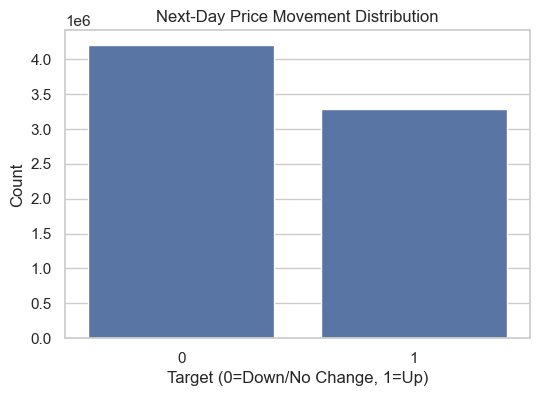

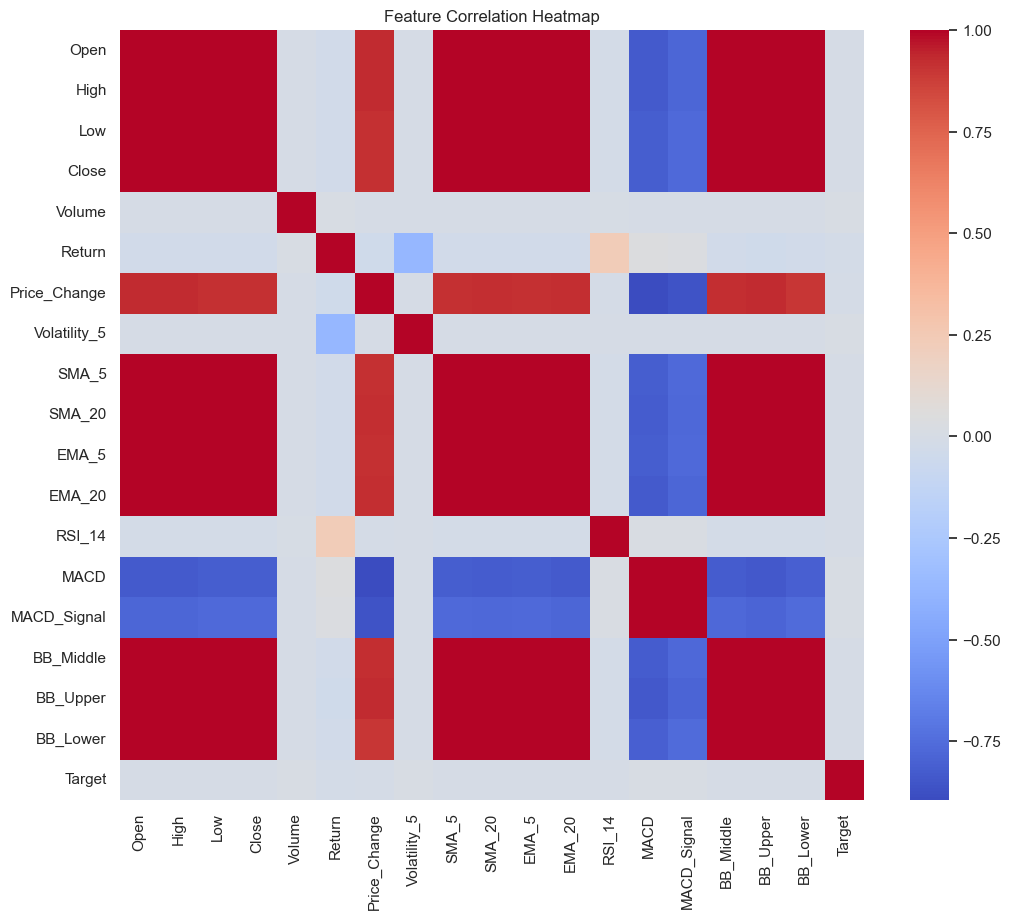

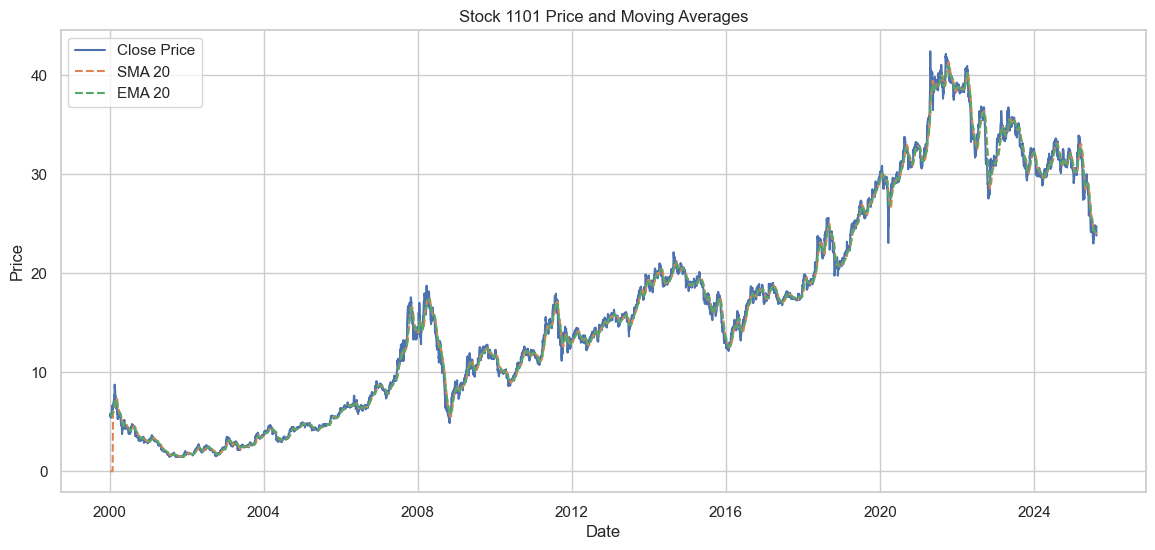

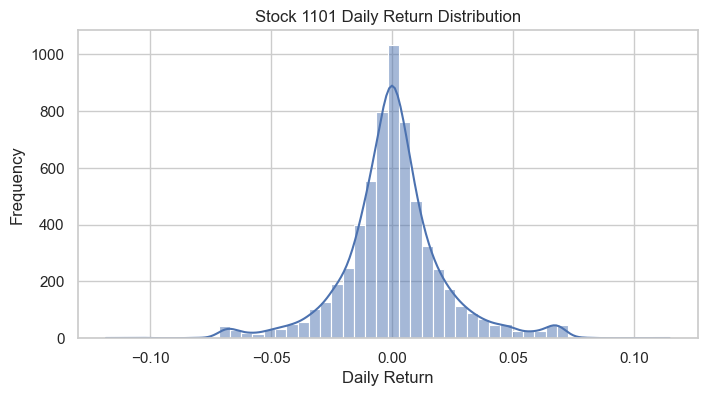

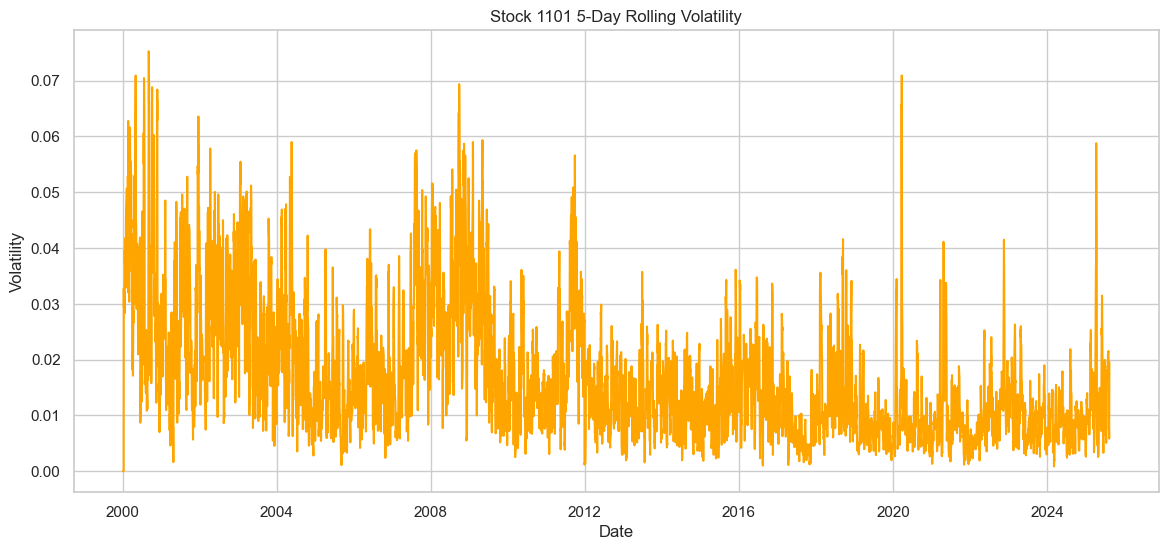

In [6]:
# Prepare Features, Target, and Perform EDA

import matplotlib.dates as mdates

# 1. Recreate Target Column

# Next-day closing price
all_stocks_df['Next_Close'] = all_stocks_df.groupby('Stock')['Close'].shift(-1)

# Binary target: 1 = price goes up, 0 = down/no change
all_stocks_df['Target'] = (all_stocks_df['Next_Close'] > all_stocks_df['Close']).astype(int)

# Drop rows with NaN target (last row per stock)
all_stocks_df.dropna(subset=['Target'], inplace=True)


# 2. Define Features and Target

feature_cols = [
    'Open', 'High', 'Low', 'Close', 'Volume', 'Return', 'Price_Change', 'Volatility_5',
    'SMA_5', 'SMA_20', 'EMA_5', 'EMA_20', 'RSI_14', 'MACD', 'MACD_Signal',
    'BB_Middle', 'BB_Upper', 'BB_Lower'
]

X = all_stocks_df[feature_cols]
y = all_stocks_df['Target']

print("Features and target defined successfully.\n")


# 3. Exploratory Data Analysis

# Basic statistics
print("Basic statistics of numeric features:")
display(X.describe())

# Target class distribution
print("\nTarget class distribution:")
print(y.value_counts(normalize=True))

# Plot target distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title('Next-Day Price Movement Distribution')
plt.xlabel('Target (0=Down/No Change, 1=Up)')
plt.ylabel('Count')
plt.show()

# Correlation heatmap (sample for speed)
sample_df = all_stocks_df.sample(n=10000, random_state=42)
plt.figure(figsize=(12,10))
sns.heatmap(sample_df[feature_cols + ['Target']].corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Sample stock trends
sample_stock = '1101'  # choose a stock from dataset
stock_df = all_stocks_df[all_stocks_df['Stock'] == sample_stock]

plt.figure(figsize=(14,6))
plt.plot(stock_df['Date'], stock_df['Close'], label='Close Price')
plt.plot(stock_df['Date'], stock_df['SMA_20'], label='SMA 20', linestyle='--')
plt.plot(stock_df['Date'], stock_df['EMA_20'], label='EMA 20', linestyle='--')
plt.title(f'Stock {sample_stock} Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Daily return distribution
plt.figure(figsize=(8,4))
sns.histplot(stock_df['Return'], bins=50, kde=True)
plt.title(f'Stock {sample_stock} Daily Return Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

# Volatility over time
plt.figure(figsize=(14,6))
plt.plot(stock_df['Date'], stock_df['Volatility_5'], color='orange')
plt.title(f'Stock {sample_stock} 5-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


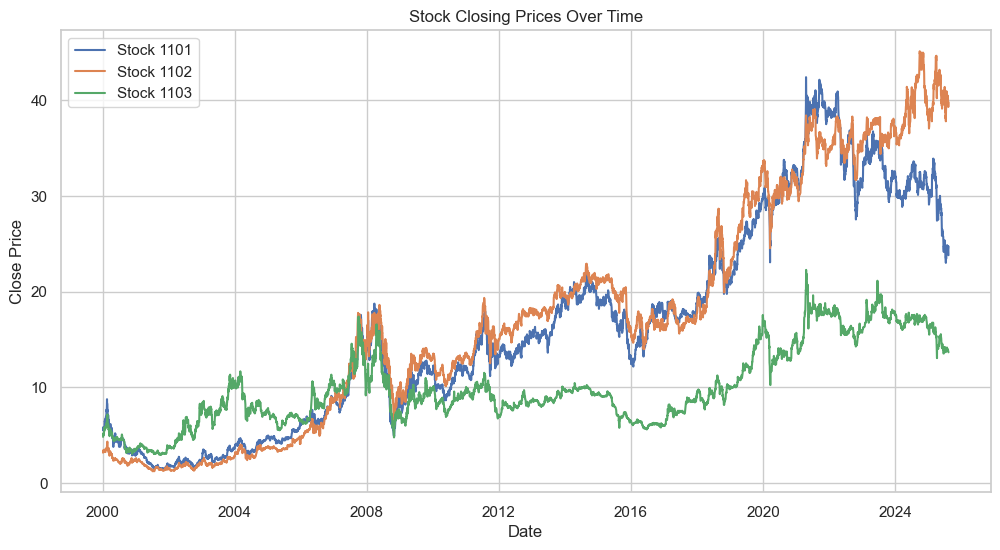

In [19]:
# Plot stock closing prices over time (example: first 3 stocks)
sample_stocks = all_stocks_df['Stock'].unique()[:3]

plt.figure(figsize=(12,6))
for s in sample_stocks:
    subset = all_stocks_df[all_stocks_df['Stock'] == s]
    plt.plot(subset['Date'], subset['Close'], label=f'Stock {s}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Closing Prices Over Time')
plt.legend()
plt.show()


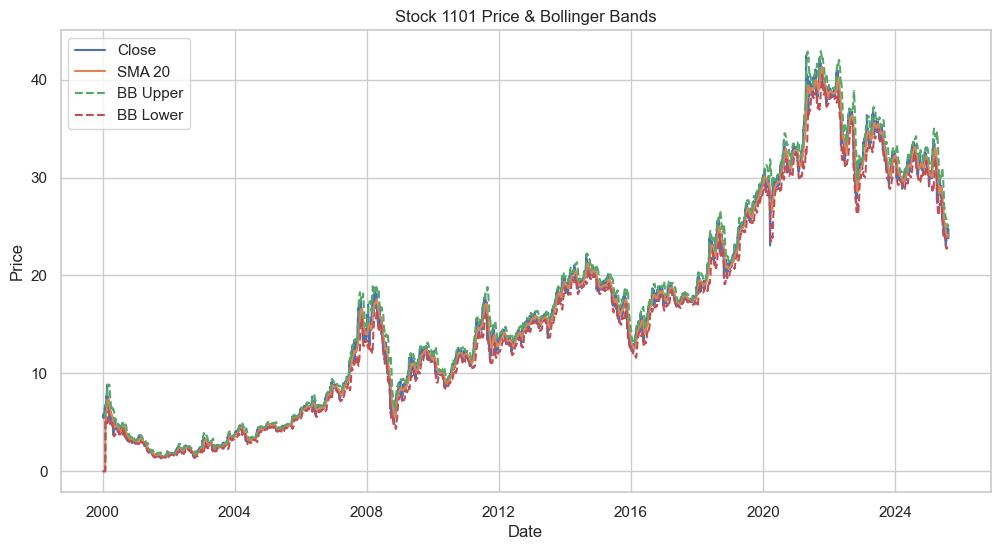

In [20]:
# Compare moving averages and Bollinger Bands for a single stock
stock_example = all_stocks_df[all_stocks_df['Stock'] == sample_stocks[0]]

plt.figure(figsize=(12,6))
plt.plot(stock_example['Date'], stock_example['Close'], label='Close')
plt.plot(stock_example['Date'], stock_example['SMA_20'], label='SMA 20')
plt.plot(stock_example['Date'], stock_example['BB_Upper'], label='BB Upper', linestyle='--')
plt.plot(stock_example['Date'], stock_example['BB_Lower'], label='BB Lower', linestyle='--')
plt.title(f'Stock {sample_stocks[0]} Price & Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [7]:
# Time-Series Train/Test Split and Scaling

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Sort data by Stock and Date to preserve time-series order
all_stocks_df.sort_values(by=['Stock', 'Date'], inplace=True)

# 2. Define a train/test split ratio (e.g., 80% train, 20% test) using time series
train_size = 0.8

train_indices = []
test_indices = []

for stock in all_stocks_df['Stock'].unique():
    stock_df = all_stocks_df[all_stocks_df['Stock'] == stock]
    n = len(stock_df)
    split_point = int(n * train_size)
    train_indices.extend(stock_df.index[:split_point])
    test_indices.extend(stock_df.index[split_point:])

X_train = X.loc[train_indices]
X_test = X.loc[test_indices]
y_train = y.loc[train_indices]
y_test = y.loc[test_indices]

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# 3. Scale features (fit on train, transform both train and test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully and ready for modeling.")


Training samples: 5990845
Testing samples: 1498666
Features scaled successfully and ready for modeling.


In [8]:
# Baseline Model Training and Evaluation

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 1. Train Random Forest Classifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate Random Forest
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))



Random Forest Performance:
Accuracy: 0.5536
Precision: 0.5940
Recall: 0.0224
F1 Score: 0.0433
Confusion Matrix:
[[814492  10341]
 [658706  15127]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.99      0.71    824833
           1       0.59      0.02      0.04    673833

    accuracy                           0.55   1498666
   macro avg       0.57      0.50      0.38   1498666
weighted avg       0.57      0.55      0.41   1498666



In [9]:
# 2. Train XGBoost Classifier

xgb_model = XGBClassifier(
    n_estimators=200, max_depth=6, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42, use_label_encoder=False, eval_metric='logloss'
)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate XGBoost
print("XGBoost Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Performance:
Accuracy: 0.5543
Precision: 0.5306
Recall: 0.0751
F1 Score: 0.1316
Confusion Matrix:
[[780059  44774]
 [623228  50605]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.95      0.70    824833
           1       0.53      0.08      0.13    673833

    accuracy                           0.55   1498666
   macro avg       0.54      0.51      0.42   1498666
weighted avg       0.54      0.55      0.44   1498666



In [12]:
import joblib

# Save Random Forest model
joblib.dump(rf_model, "random_forest_model.pkl")
print(" Random Forest model saved as 'random_forest_model.pkl'")

# Save XGBoost model
joblib.dump(xgb_model, "xgboost_model.pkl")
print(" XGBoost model saved as 'xgboost_model.pkl'")


 Random Forest model saved as 'random_forest_model.pkl'
 XGBoost model saved as 'xgboost_model.pkl'


# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade